<a href="https://colab.research.google.com/github/Anilabhimanyu/Data-Science/blob/main/RNN_network_for_sine_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,SimpleRNN
from sklearn.metrics import mean_squared_error

In [74]:
features=np.arange(0,360)
target=[np.sin(x) for x in features]

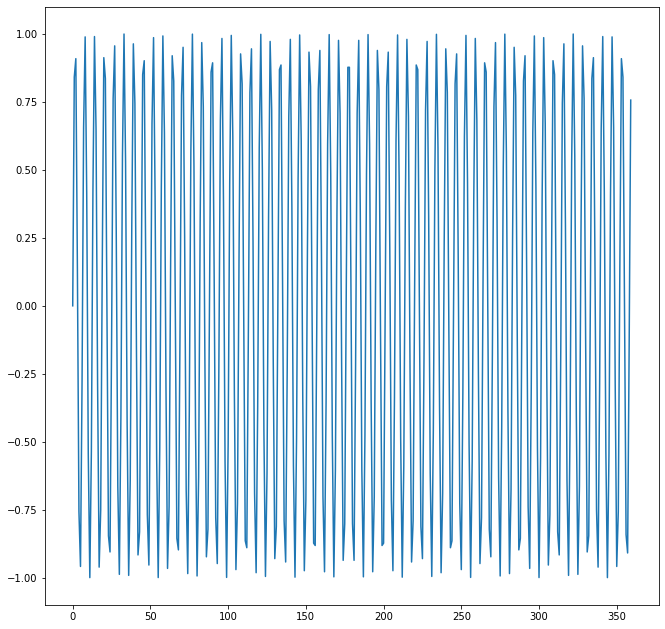

In [75]:
%matplotlib inline


# plt.xlabel('sine wave')
# plt.gcf().set_size_inches(20,8)
plt.figure(figsize=(11,11))
plt.plot(target)
plt.show()

In [76]:
!pip install watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
import watermark
 
%load_ext watermark

%watermark -n -v -m -p numpy,scipy,keras,matplotlib,sklearn,pandas



The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.9.0

numpy     : 1.21.6
scipy     : 1.7.3
keras     : 2.11.0
matplotlib: 3.2.2
sklearn   : 1.0.2
pandas    : 1.3.5

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [78]:
%watermark -n -v -m -p numpy,scipy,keras,matplotlib,sklearn,pandas


Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.9.0

numpy     : 1.21.6
scipy     : 1.7.3
keras     : 2.11.0
matplotlib: 3.2.2
sklearn   : 1.0.2
pandas    : 1.3.5

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [79]:
df=pd.DataFrame({'features':features,'target':target})
df.head()

,features,target
0,0,0.000000
1,1,0.841471
2,2,0.909297
3,3,0.141120
4,4,-0.756802


In [80]:
features=df['features'].values.reshape(-1,1)
target=df['target'].values.reshape(-1,1)



range=int(2/3*features.size)+1

X_train,X_test=features[0:range],features[range:]
y_train,y_test=target[0:range],target[range:]


In [81]:
X_train.shape,y_train.shape,X_test.shape

((241, 1), (241, 1), (119, 1))

In [82]:
# The SimpleRNN model expects a 3D ([samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)


(241, 1, 1)
(119, 1, 1)


In [83]:
model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_17 (SimpleRNN)   (None, 10)                120       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.fit(X_train,y_train,epochs=100)
# model.fit()

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.8667
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7685
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6918
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6281
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5813
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5489
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5265
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5140
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5065
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5007
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4999
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4991
Epoch 13/100
8/8 [==============================] - 0s 3ms/st

In [85]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
y_test_pred.shape

4/4 [==============================] - 0s 4ms/step


(119, 1)

In [86]:
df['RNN_train_predict'] = 0
df['RNN_test_predict'] = 0
df['RNN_test_predict'][range:]=y_test_pred.reshape(119,)
df['RNN_train_predict'][:range]=y_train_pred.reshape(241,)

<ipython-input-86-0d9f7c3cefdb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RNN_test_predict'][range:]=y_test_pred.reshape(119,)
<ipython-input-86-0d9f7c3cefdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RNN_train_predict'][:range]=y_train_pred.reshape(241,)


In [87]:
df['RNN_test_predict'].shape

(360,)

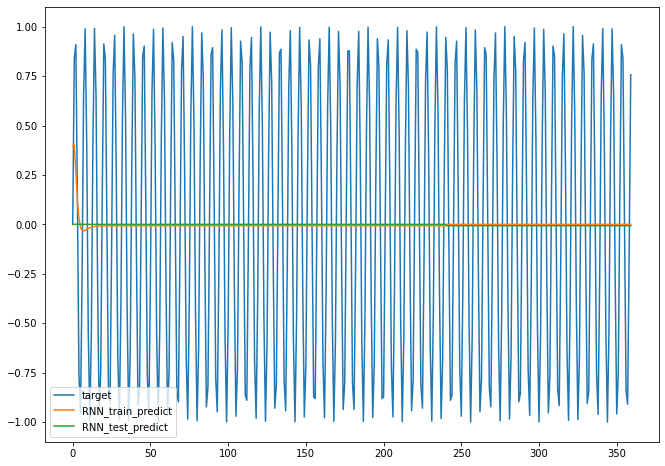

In [88]:
df[['target', 'RNN_train_predict', 'RNN_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

In [89]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10)                480       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [90]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
y_test_pred.shape

4/4 [==============================] - 0s 4ms/step


(119, 1)

In [91]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
y_test_pred.shape

4/4 [==============================] - 0s 4ms/step


(119, 1)

In [92]:
df['RNN_train_predict'] = 0
df['RNN_test_predict'] = 0
df['RNN_test_predict'][range:]=y_test_pred.reshape(119,)
df['RNN_train_predict'][:range]=y_train_pred.reshape(241,)

<ipython-input-92-0d9f7c3cefdb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RNN_test_predict'][range:]=y_test_pred.reshape(119,)
<ipython-input-92-0d9f7c3cefdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RNN_train_predict'][:range]=y_train_pred.reshape(241,)


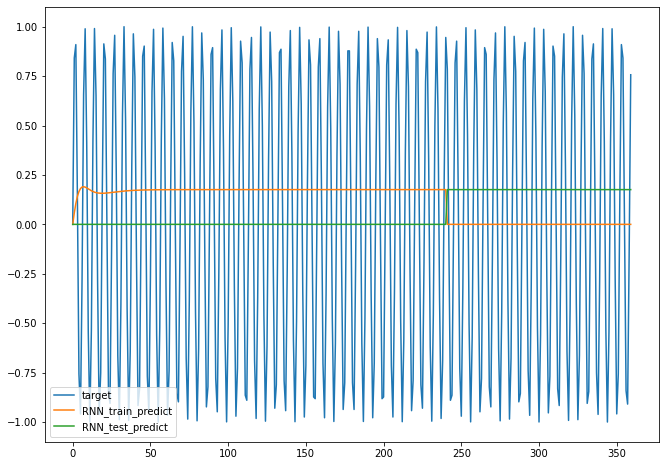

In [93]:
df[['target', 'RNN_train_predict', 'RNN_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)